<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2022/blob/main/notebooks/es5/MetodiAI_Fis2022_Es5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercitazione 5: algoritmi per la visualizzazione di campioni multivariati e riduzione dimensionale 

**Task:** Scopo: familiarizzare con l'implementazione di algoritmi di riduzione dimensionale (PCA, tSNE, UMAP) usando i package scikit-learn e umap-learn

**Dataset:** MNIST, Ising 2D (precedente esercitazione)

In [1]:
# scarica dataset Ising2D
!rm -rf ising_conf.dat.gz
!rm -rf ising_conf.dat
!rm -rf ising_label.dat.gz
!rm -rf ising_label.dat
!wget http://giagu.web.cern.ch/giagu/CERN/ising_conf.dat.gz
!wget http://giagu.web.cern.ch/giagu/CERN/ising_label.dat.gz
!gunzip ising_conf.dat.gz
!gunzip ising_label.dat.gz

--2022-04-05 14:46:32--  http://giagu.web.cern.ch/giagu/CERN/ising_conf.dat.gz
Resolving giagu.web.cern.ch (giagu.web.cern.ch)... 188.184.21.205, 2001:1458:d00:34::100:59
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.184.21.205|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2953855 (2.8M) [application/gzip]
Saving to: ‘ising_conf.dat.gz’

ising_conf.dat.gz   100%[===================>]   2.82M   490KB/s    in 9.5s    

2022-04-05 14:46:42 (304 KB/s) - ‘ising_conf.dat.gz’ saved [2953855/2953855]

--2022-04-05 14:46:42--  http://giagu.web.cern.ch/giagu/CERN/ising_label.dat.gz
Resolving giagu.web.cern.ch (giagu.web.cern.ch)... 188.184.21.205, 2001:1458:d00:34::100:59
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.184.21.205|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86723 (85K) [application/gzip]
Saving to: ‘ising_label.dat.gz’

ising_label.dat.gz  100%[===================>]  84.69K   353KB/s    in 0.2s    

2022-04

In [5]:
# legge dataset Ising2D
import numpy as np

#leggiamo le configurazioni ising dal file usando numpy (25k esempi oguno da 28x28 spin)
X_ising = np.loadtxt('ising_conf.dat')
X_ising = X_ising.reshape(25000,28*28)
print('X_ising shape: ',X_ising.shape)

#leggiamo da file le label associate:
T_ising = np.loadtxt('ising_label.dat')
print('T_ising shape: ',T_ising.shape)

ord_sele = (T_ising < 2.0)
cri_sele = ((T_ising >= 2.0) & (T_ising <= 2.5))
dis_sele = (T_ising > 2.5)

Y_ising = np.zeros(shape=T_ising.shape)
Y_ising[ord_sele]=0
Y_ising[cri_sele]=1
Y_ising[dis_sele]=2

print('Y_ising shape: ',Y_ising.shape)

X_ising shape:  (25000, 784)
T_ising shape:  (25000,)
Y_ising shape:  (25000,)


In [23]:
#scarica e legge dataset MNIST from openml (https://openml.org/)
from sklearn.datasets import fetch_openml

X_mnist, Y_mnist = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

print(X_mnist.shape)
print(Y_mnist.shape)
Y_mnist = Y_mnist.astype(int)

(70000, 784)
(70000,)


**Parte 1:**

Analisi PCA: campione Ising2D

1.   implementare un'analisi a componenti prncipali (PCA) usando la libreria sklearn:

`from sklearn.decomposition import PCA`

2.   printare il valore della varianza spiegata per le prime 10 componenti PCA 

3.   graficare lo scatter plot delle prime due componenti principali in due plot distinti: uno in cui ogni configurazione viene colorata in accordo al valore della temeperatura, e un secondo in cui ogni configurazione viene colorata in accordo ad una delle tre clasi *(0,1,2)* corrispondenti alle configurazioni ordinate, critiche e disordinate, rispettivamente.

In [ ]:
#code

In [6]:
#@title Soluzione 1.1 e 1.2

from sklearn.decomposition import PCA

#NOTA: prima di applicare la PCA è importante normalizzare le feature in modo che abbiano 
# varianze simili. Nel caso specifico del campione Ising2D non è necessario farlo 
# perché i valori di ogni spin (pixel) sono già compresi tra -1 e 1 per costruzione

# istanzio una PCA con 10 componenti
pca = PCA(n_components=10)

# calcolo la trasformazione PCA su i dati di input (fit) e contestualmente la applico 
# ai dati stessi (fit_transform)
pca_result = pca.fit_transform(X_ising)


# varianza spiegata (è un vettore corrispondente alle n_componewents)
exp_var = pca.explained_variance_ratio_

for i in range(0,len(exp_var)):
  print('explained variance componente: ',i, ' = ', exp_var[i])
print('Explained variance totale delle prime 10 componenti della PCA: {}'.format(sum(exp_var)))

#NOTA: l'explained variance indica quanto ciascuna componente contribusice alla varianza totale del campione



explained variance componente:  0  =  0.36692223272716284
explained variance componente:  1  =  0.020684599425619357
explained variance componente:  2  =  0.019794912324758458
explained variance componente:  3  =  0.01966579221624204
explained variance componente:  4  =  0.01920186524967274
explained variance componente:  5  =  0.005148076556140893
explained variance componente:  6  =  0.004999562279573887
explained variance componente:  7  =  0.0049444644280748256
explained variance componente:  8  =  0.004900826515592206
explained variance componente:  9  =  0.004781978340606958
Explained variance totale delle prime 10 componenti della PCA: 0.4710443100634442


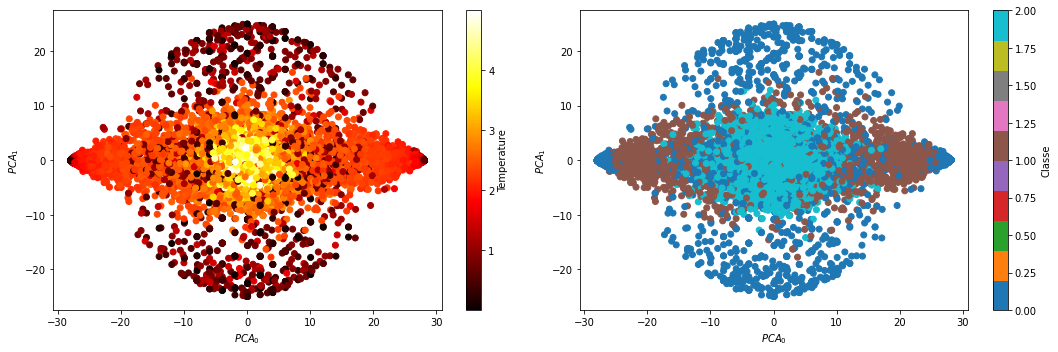

In [10]:
#@title Soluzione 1.3

import matplotlib.pyplot as plt

# grafico PCA
# pca_results prodotto da fit_transform è un array numpy di dimensione (numero eventi, n_components)
# che conteiene il valore delle n_components della PCA

# plottiamo la prima componente vs la seconda

#colorando i punti in accordo alla temperatura T_ising
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(pca_result[:,0], pca_result[:,1], c=T_ising, cmap='hot')
cbar = plt.colorbar()
cbar.set_label('Temperature')
plt.xlabel('$PCA_0$')
plt.ylabel('$PCA_1$')
# e in accordo alla label Y_ising
plt.subplot(1,2,2)
plt.scatter(pca_result[:,0], pca_result[:,1], c=Y_ising, cmap='tab10')
cbar = plt.colorbar()
cbar.set_label('Classe')
plt.xlabel('$PCA_0$')
plt.ylabel('$PCA_1$')
plt.tight_layout()

**Parte 2:**

Analisi PCA: campione MNIST

0.   normalizzare le immagini in [0,1] e graficare le prime 16 immagini mnist

1.   implementare un'analisi a componenti prncipali (PCA) usando la libreria sklearn sul campione MNIST

2.   printare il valore della varianza spiegata per le prime 10 componenti PCA 

3.   graficare lo scatter plot delle prime due componenti principali in cui ogni configurazione viene colorata in accordo al valore della label di classe Y_mnist (0,1,2,3,...,9)

4.   applicare la trasformzione inversa PCA per tornare nello spazio originale alle prime 10 componenti principali, e graficare le prime 16 immagini mnist confrontandole con le immagini originali ... cosa è cambiato? Perché? 
Riprovare usando 2 componenti principali, cosa cambia? Quante componenti sono necessarie per avere una ricostruzione in cui i caratteri siano percepibili?

<Figure size 432x288 with 0 Axes>

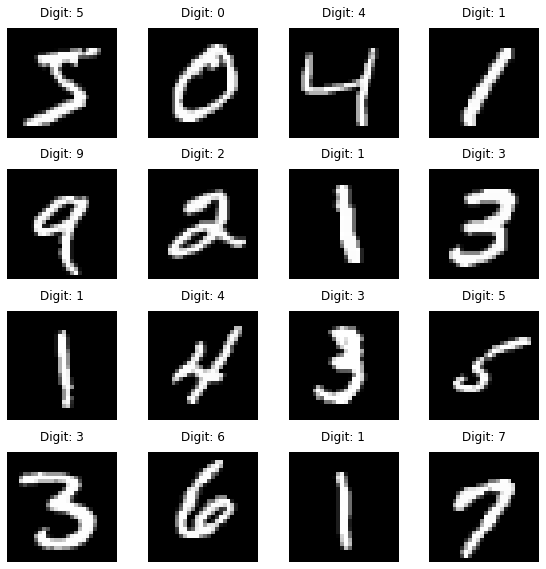

In [48]:
#@title Soluzione 2.0

# normalizzazione

#NOTA: prima di applicare la PCA è importante normalizzare le feature in modo che abbiano 
# varianze simili. Nel caso specifico del campione Ising2D non è necessario farlo 
# perché i valori di ogni spin (pixel) sono già compresi tra -1 e 1 per costruzione

X_minist = X_mnist/256.  

import matplotlib.pyplot as plt
plt.gray()
fig = plt.figure( figsize=(8,8) )

for i in range(0,16):
  ax = fig.add_subplot(4,4,i+1, title='Digit: {}'.format(str(Y_mnist[i])))
  ax.matshow(X_mnist[i].reshape(28,28).astype(float))
  plt.axis('off')
plt.tight_layout()
plt.show()

explained variance componente:  0  =  0.09746115922494615
explained variance componente:  1  =  0.07155444586867002
explained variance componente:  2  =  0.061495309806999604
explained variance componente:  3  =  0.05403384528265572
explained variance componente:  4  =  0.048889337029494495
explained variance componente:  5  =  0.04305227027514906
explained variance componente:  6  =  0.032782613598100724
explained variance componente:  7  =  0.028896405122248166
explained variance componente:  8  =  0.027583609793718135
explained variance componente:  9  =  0.02342137146417115
Explained variance totale delle prime 10 componenti della PCA: 0.48917036746615333


Text(0, 0.5, '$PCA_1$')

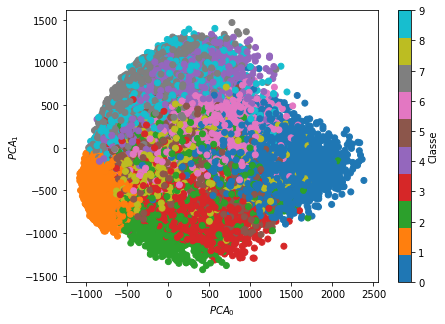

In [49]:
#@title Soluzione 2.1-2.2-2.3

from sklearn.decomposition import PCA

pca2 = PCA(n_components=10)

pca2_result = pca2.fit_transform(X_mnist)

exp_var2 = pca2.explained_variance_ratio_

for i in range(0,len(exp_var2)):
  print('explained variance componente: ',i, ' = ', exp_var2[i])
print('Explained variance totale delle prime 10 componenti della PCA: {}'.format(sum(exp_var2)))

import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(pca2_result[:,0], pca2_result[:,1], c=Y_mnist, cmap='tab10')
cbar = plt.colorbar()
cbar.set_label('Classe')
plt.xlabel('$PCA_0$')
plt.ylabel('$PCA_1$')

<Figure size 432x288 with 0 Axes>

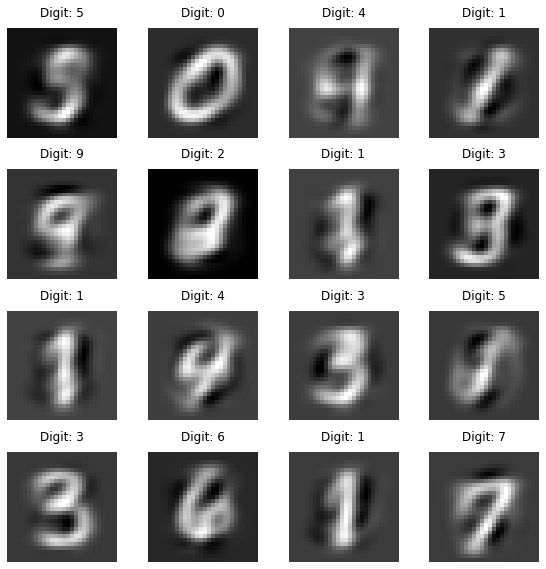

In [50]:
#@title Soluzione 2.4


# pca transformation: X -> PCA
# inverse pca transformation: PCA -> X' 
# nota: X' non e' uguale a X perché parte dell'informazione e' andata perduta avendo salvato solo 
# n_components della PCA e non tutte (più il numero di componenti è piccolo più la 
# perdita di informazione è consistente)

#applichiamo la tarsformazione solo alle prime 16 immagini
Xtransf_mnist = pca2.inverse_transform(pca2_result[:16])

# plottiamo le immagini
plt.gray()
fig = plt.figure( figsize=(8,8) )

for i in range(0,16):
  ax = fig.add_subplot(4,4,i+1, title='Digit: {}'.format(str(Y_mnist[i])))
  ax.matshow(Xtransf_mnist[i].reshape(28,28).astype(float))
  plt.axis('off')
plt.tight_layout()
plt.show()

**Parte 3:**

Ripetere la parte 2 (punti 1,2,3) usando tSNE come algoritmo di rappresentazione di manifold multidimensionali (usare n_components del TSNE=2):

`from sklearn.manifold import TSNE`

NOTA: tSNE può essere molto lento se il numero di feature x numero di eventi è grande, in tal caso è possibile applicare prima una PCA che riduca le dimensioni a <=50 e poi applicare tSNE alle variabili PCA

Usare solo i primi 5000 eventi del campione MNIST e applicare tSNE, per diversi valori della perplexity: 5, 20 e 40 e confrontare i plot nello spazio tSNE0 vs tSNE1.

Usare tutti i dati ma dare in input a tSNE la pca a 50 componenti calcolata prima. Conforntare il plot con quelli precedenti.

In [ ]:
#code

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 1.950s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 378.968424
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.374084
[t-SNE] KL divergence after 300 iterations: 3.149242
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.005s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 5000 samples in 1.409s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 528.343833
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.984680
[t-SNE] KL divergence after 300 iterations: 2.423520
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.005s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 5000 samples in 1.418s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 595.778536
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.101257
[t-SNE] KL divergence after 300 iterations: 2.049693
Time elapsed: 52.69502544403076 seconda


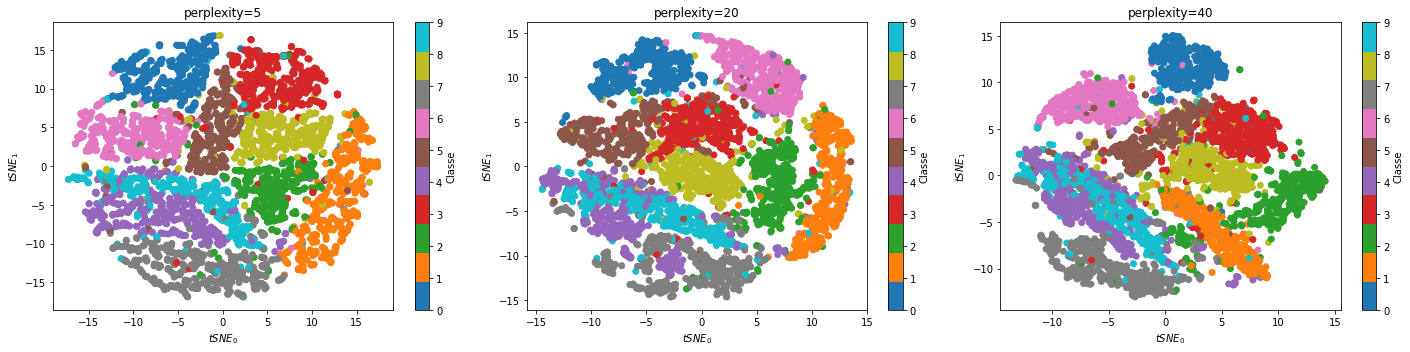

In [60]:
#@title Soluzione 3A

from sklearn.manifold import TSNE
import time



# è importante testare valori della perplexity tra 5 e 50 circa e scegliuere quello che
# fornisce la migliore rappresentazione

tsne1 = TSNE(n_components=2, verbose=1, random_state=12345, perplexity=5, n_iter=300)
tsne2 = TSNE(n_components=2, verbose=1, random_state=12345, perplexity=20, n_iter=300)
tsne3 = TSNE(n_components=2, verbose=1, random_state=12345, perplexity=40, n_iter=300)


time_start = time.time()
tsne_result1 = tsne1.fit_transform(X_mnist[:5000])
tsne_result2 = tsne2.fit_transform(X_mnist[:5000])
tsne_result3 = tsne3.fit_transform(X_mnist[:5000])
print('Time elapsed: {} seconda'.format(time.time()-time_start))

plt.figure(figsize=(20,5))

ax1 = plt.subplot(1,3,1)
plt.scatter(tsne_result1[:,0], tsne_result1[:,1], c=Y_mnist[:5000], cmap='tab10')
ax1.title.set_text('perplexity=5')
cbar = plt.colorbar()
cbar.set_label('Classe')
plt.xlabel('$tSNE_0$')
plt.ylabel('$tSNE_1$')

ax2 = plt.subplot(1,3,2)
plt.scatter(tsne_result2[:,0], tsne_result2[:,1], c=Y_mnist[:5000], cmap='tab10')
ax2.title.set_text('perplexity=20')
cbar = plt.colorbar()
cbar.set_label('Classe')
plt.xlabel('$tSNE_0$')
plt.ylabel('$tSNE_1$')

ax3 = plt.subplot(1,3,3)
plt.scatter(tsne_result3[:,0], tsne_result3[:,1], c=Y_mnist[:5000], cmap='tab10')
ax3.title.set_text('perplexity=40')
cbar = plt.colorbar()
cbar.set_label('Classe')
plt.xlabel('$tSNE_0$')
plt.ylabel('$tSNE_1$')

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.240s...
[t-SNE] Computed neighbors for 70000 samples in 48.228s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for s

Text(0, 0.5, '$tSNE_1$')

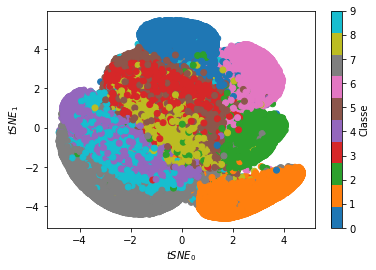

In [62]:
#@title Soluzione 3B
tsne4 = TSNE(n_components=2, verbose=1, random_state=12345, perplexity=40, n_iter=300)

time_start = time.time()
tsne_result4 = tsne4.fit_transform(pca2_result)
print('Time elapsed: {} seconda'.format(time.time()-time_start))

plt.scatter(tsne_result4[:,0], tsne_result4[:,1], c=Y_mnist, cmap='tab10')
cbar = plt.colorbar()
cbar.set_label('Classe')
plt.xlabel('$tSNE_0$')
plt.ylabel('$tSNE_1$')

**Parte 4:**

Ripetere la parte 2 (punti 1,2,3) usando UMAP come algoritmo di rappresentazione di manifold multidimensionali, applicarlo solo sui primi 5000 eventi MNIST e usare come input i dati mnist trasformati con PCA con 10 componenti.


```
!pip install umap-learn

import umap  # pip install umap-learn

manifold = umap.UMAP().fit(X, Y)
manifold_reduced = manifold.transform(X)

#e poi plottare manifold_reduced[:,0] vs [:,1] come fatto per PCA e tSNE

```

Quali sono le differenze?

In [64]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 17.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=376a84d4ba4d48d5f2530336ed0af505f9310061f54bc4c24c5284a6407de312
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=a6d45022524b457c8bd338f3f6ffecac4dd402ff790d4a60cfa512892ca40188
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [ ]:
#code 

Text(0, 0.5, '$UMAP_1$')

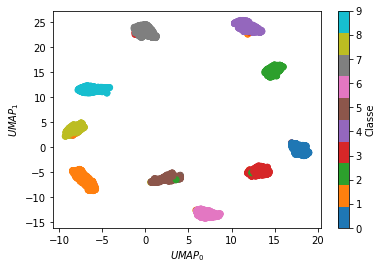

In [68]:
#@title Soluzione 4
import umap

manifold = umap.UMAP().fit(pca2_result[:5000], Y_mnist[:5000])
X_mnist_reduced = manifold.transform(pca2_result[:5000])

plt.scatter(X_mnist_reduced[:,0], X_mnist_reduced[:,1], c=Y_mnist[:5000], cmap='tab10')
cbar = plt.colorbar()
cbar.set_label('Classe')
plt.xlabel('$UMAP_0$')
plt.ylabel('$UMAP_1$')

**Per casa:**

giocare con i vari algorimti, i parametri da cui dipendono, etc..

documentazione: 

*   PCA e tSNE sul sito di [scikit-learn](https://scikit-learn.org/stable/)
*   UMAP sul sito di [umap-learn](https://umap-learn.readthedocs.io/en/latest/index.html)


